In [1]:
# Import necessary modules
import geopandas as gpd
from shapely.geometry import Polygon, mapping
import json
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

from helper_functions import cart_to_polar, get_intersection
from data_processing import load_data, plot_data, get_left_and_right_bound, trim_datasets
from helper_functions import get_area, get_distance


In [2]:
# Set filepath
suburban = "Data/Suburban 2006.shp"

# Read file using gpd.read_file()
data = gpd.read_file(suburban)


In [3]:
poly_mapped = mapping(data)
poly_coordinates = poly_mapped['features'][0]['geometry']['coordinates'][0]
#coords = [coords[0,1] for coords in poly_coordinates]
lats = [coords[1] for coords in poly_coordinates]
lons = [coords[0] for coords in poly_coordinates]

df = pd.DataFrame({
    'lat':lats,
    'lon':lons})


In [4]:
df_np = df.to_numpy()

In [5]:
degree_list = []
distance_list = []
for x in range(len(df)):
    lat=(df['lat'][x])
    lon=(df['lon'][x])
    hyp = math.hypot(lat, lon)
    if lon >0:
        degree = 90- math.degrees(math.atan(lat/lon))
    else:
        degree = -90+ math.degrees(math.atan(lat/-lon))
    degree_list.append(degree)
    distance_list.append(hyp)
    

df['distance'] = distance_list 
df['degree']=degree_list

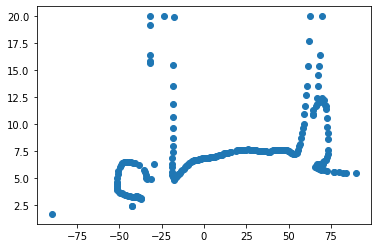

In [6]:
plt.scatter(df.degree, df.distance)

In [10]:
val =0
dist = np.average(df.loc[(df['degree']>val-1)&(df['degree']<val+1)]['distance'])
z = 1.58

In [14]:
angle = math.degrees(math.atan(z/dist))
other_angle = 90-angle


In [18]:
angle, other_angle

(12.964819004958393, 77.0351809950416)

In [34]:
# Elementary School Child height: 5th percentile 7 yo female shoulder height of 37 inches (0.9398)
# Adult height: 5th percentile adult female shoulder height of 49 inches (1.2446)
# Elementary School Child on Bicycle: 5th percentile 7yo female shoulder height on bicycle ()
# Adult on Bicycle: 5th percentile adult female shoulder height on bicycle

elem_child_height = 0.9398
adult_height = 1.2446

dist_elem_child = (dist - elem_child_height * math.sin(math.radians(other_angle)) / math.sin(math.radians(angle)))
print("distance to an elementary school child is: ", dist_elem_child, " meters")

dist_adult = dist - (adult_height * math.sin(math.radians(other_angle)) / math.sin(math.radians(angle)))
print("distance to an adult is: ", dist_adult, " meters")

distance to an elementary school child is:  2.7807998554821935  meters
distance to an adult is:  1.4568576562460605  meters


In [43]:
z = 1.58
for val in range(-10, 50, 10):
    print(val)
    dist = np.average(df.loc[(df['degree']>val-1)&(df['degree']<val+1)]['distance'])
    angle = math.degrees(math.atan(z/dist))
    other_angle = 90-angle
    dist_elem_child = (dist - elem_child_height * math.sin(math.radians(other_angle)) / math.sin(math.radians(angle)))*3.28084
    print("distance to an elementary school child is: ", dist_elem_child, " feet")

    dist_adult = (dist - (adult_height * math.sin(math.radians(other_angle)) / math.sin(math.radians(angle))))*3.28084
    print("distance to an adult is: ", dist_adult, " feet")


-10
distance to an elementary school child is:  8.216730521993709  feet
distance to an adult is:  4.304735109460623  feet
0
distance to an elementary school child is:  9.1233593978602  feet
distance to an adult is:  4.779716872918325  feet
10
distance to an elementary school child is:  9.54147435784965  feet
distance to an adult is:  4.998766791038386  feet
20
distance to an elementary school child is:  10.10356392913494  feet
distance to an adult is:  5.293244832602091  feet
30
distance to an elementary school child is:  10.067229786340828  feet
distance to an adult is:  5.274209419460661  feet
40
distance to an elementary school child is:  9.986266093487052  feet
distance to an adult is:  5.2317926394182415  feet


In [ ]:
# x = 52
# y = -235
# z = 158

# height of elementary school child = 0.6858

In [8]:
df.sort_values('distance')

,lat,lon,distance,degree
5,0.0000,-1.6838,1.683800,-90.000000
7,1.7912,-1.6586,2.441178,-42.798805
6,1.8103,-1.6503,2.449628,-42.352829
8,2.4690,-1.8910,3.109959,-37.448400
9,2.4703,-1.8976,3.115007,-37.530238
...,...,...,...,...
58,18.9446,-6.1566,19.919879,-18.003081
180,6.9526,18.7447,19.992559,69.649670
179,9.1840,17.7604,19.994441,62.656268
57,18.3196,-8.0149,19.996159,-23.629575


In [9]:
df.loc[(df['degree']>-40)].sort_values('degree')

,lat,lon,distance,degree
13,2.5525,-2.1190,3.317441,-39.698321
12,2.5522,-2.0774,3.290793,-39.144363
11,2.5274,-2.0205,3.235764,-38.640174
44,4.8931,-3.9094,6.263053,-38.623519
10,2.5033,-1.9654,3.182657,-38.136296
...,...,...,...,...
220,1.2570,5.4562,5.599122,77.026552
1,1.0047,5.4594,5.551078,79.572462
2,0.7624,5.4647,5.517626,82.057724
3,0.5903,5.4301,5.462091,83.795804


In [14]:
df.loc[(df['degree']>-30)&(df['degree']<4)]

,lat,lon,distance,degree
5,0.0000,-1.6838,1.683800,-0.000000
101,6.8700,0.0602,6.870264,0.502055
102,6.8795,0.1682,6.881556,1.400571
103,6.8883,0.2694,6.893566,2.239685
104,6.8966,0.3639,6.906194,3.020418
105,6.9350,0.4671,6.950713,3.853280
